# General Model
In this notebook one model for all sectors is created.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
from pathlib import Path
import re
import json
import seaborn as sns

from ProjectPackage.util import *
from ProjectPackage.DataProcessing import *
from ProjectPackage.Modeling import *
from ProjectPackage.PlotFunctions import *

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

### Possible models:
0. ~One model for all sectors using a dummy variable for each sector. The model in this case will have to predict different values using the same features --> model does not make sense. (Ex: For a certain date, all the input features are the same, but the outputs are different as each company has different market cap values for the same date).~

1. One model for all sectors using a dummy variable for each company. We expect the model to differentiate between companies using this dummy variable.

2. One model for each sector, each having a dummy variable for the company name.

3. One model for each company. Too little data and requires training a large number of models.

Loading data using the defined functions:

In [2]:
feature, target = load_dataframes()

In [2]:
data, X, y = load_data_general(
    n_months=6, # Number of months ahead to be predicted
    pct_change=True, # Compute percentage change
    drop_corr_features=True, # Drop highly correlated features
    encoding_method='numeric', # Encoding method for tickers and sectors ("numeric", "one-hot", or None)
    drop=False, # Drop one of the one hot encoding columns to avoid multicollinearity
    year_range=(2008, 2017) # Range of years to be included (inclusive)
)

## Modeling percentage change

### Linear Regression 

In [2]:
all_scores = run_general_pct_model(
    LinearRegression,
    model_params={},
    model_fit_params={},
    month_range=range(1, 7),
    drop_corr_features=True,
    encoding_method='one-hot',
    drop=True,
    year_range=(2008, 2017))

C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting 

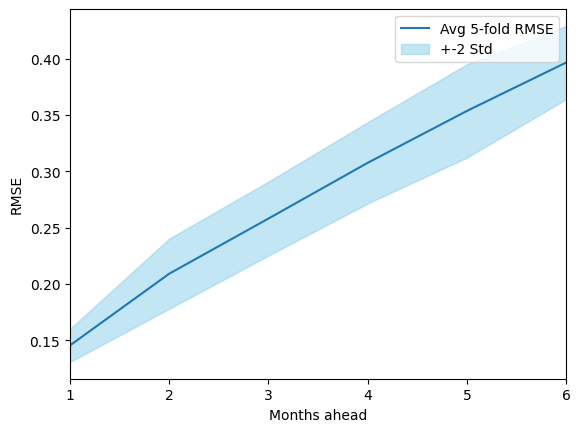

In [5]:
ax = plot_metric_by_months(all_scores, metric='RMSE', ax=None)
ax.set_title('Linear regression')
plt.show()

In [7]:
# save_scores(all_scores, 'model_scores/LR_pct_general.json')

### SVR

In [2]:
from ProjectPackage.ModelClasses import SVRRegressorRBF

In [3]:
# model_fit_params = dict(C=[0.1, 1, 50], gamma=[0.05, 0.1, 0.5, 1], cv=5, fit_grid=True)
model_fit_params = dict(C=1, gamma=0.1, cv=5, fit_grid=False)

In [4]:
month_range = range(1, 7)

all_scores = run_general_pct_model(
    SVRRegressorRBF,
    model_params={},
    model_fit_params=model_fit_params,
    month_range=month_range,
    drop_corr_features=True,
    encoding_method='one-hot',
    drop=False,
    year_range=(2008, 2017))

C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting 

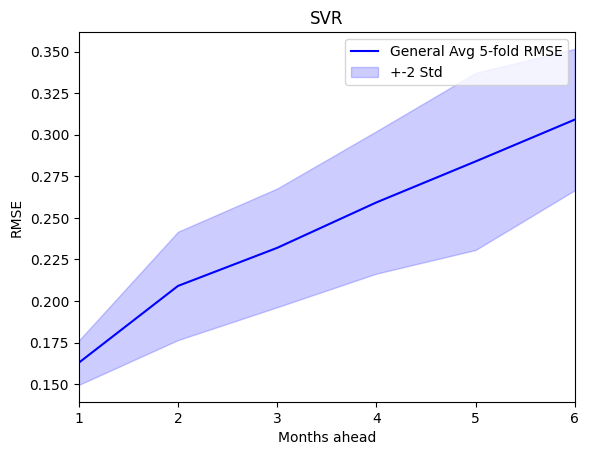

In [8]:
ax = plot_metric_by_months_general(all_scores, metric='RMSE', ax=None, color='blue')
ax.set_title('SVR')
plt.show()

In [6]:
# save_scores(all_scores, 'model_scores/SVR_pct_general.json')

Comparing with linear regression

In [9]:
lr_scores = load_scores('model_scores/LR_pct_general.json')
svr_scores = load_scores('model_scores/SVR_pct_general.json')

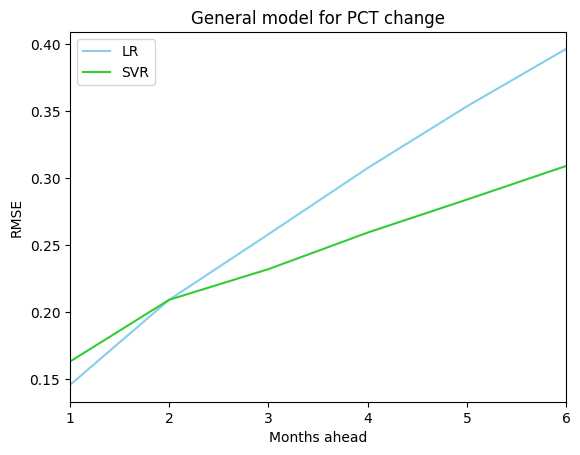

In [23]:
metric='RMSE'

fig, ax = plt.subplots()
plot_metric_by_months_general(lr_scores, metric, ax=ax, color='skyblue', std=False)
plot_metric_by_months_general(svr_scores, metric, ax=ax, color='limegreen', std=False)

handles = [ax.lines[0], ax.lines[1]]
labels = ['LR', 'SVR']
ax.legend(handles=handles, labels=labels)
ax.set_title('General model for PCT change')
plt.show()